In [35]:
# Importar as libs necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
#Lendo os dados
data = pd.read_csv('/Prostate_Cancer.csv')
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [3]:
#Traduzindo o cabeçalho das colunas para melhor entendimento

data.rename(columns={
    'diagnosis_result':'Resultado Diagnostico',
    'radius	':'Raio',
    'texture':'Textura',
    'perimeter':'Perimetro',
    'area':'Area',
    'smoothness':'Suavidade',
    'compactness':'Compacidade',
    'symmetry':'Simetria',
    'fractal_dimension':'Dimensao do Fragmento'
}, inplace=True)
data.head()

,id,Resultado Diagnostico,radius,Textura,Perimetro,Area,Suavidade,Compacidade,Simetria,Dimensao do Fragmento
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
#informação dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   Resultado Diagnostico  100 non-null    object 
 2   radius                 100 non-null    int64  
 3   Textura                100 non-null    int64  
 4   Perimetro              100 non-null    int64  
 5   Area                   100 non-null    int64  
 6   Suavidade              100 non-null    float64
 7   Compacidade            100 non-null    float64
 8   Simetria               100 non-null    float64
 9   Dimensao do Fragmento  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


Não temos valores missing

In [5]:
#Resumo estatistico dos dados
data.describe()

,id,radius,Textura,Perimetro,Area,Suavidade,Compacidade,Simetria,Dimensao do Fragmento
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [6]:
#podemos eliminar a coluna de ID, já que não agregará em nada no modelo
data = data.drop(['id'], axis = 1)

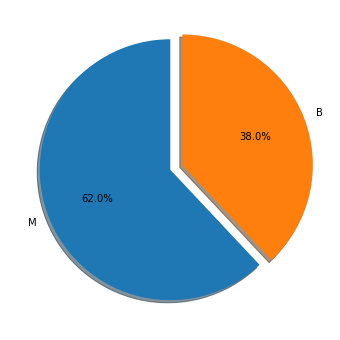

In [9]:
#Veremos como a variavel target se comporta

#Calculando os valores
data_vl = data['Resultado Diagnostico'].value_counts()

#Filtrando os labels
label = [data_vl.index.tolist()]

#tamanho da figura
plt.figure(figsize=(8,6))

#Montando o gráfico
plt.pie(data_vl, #Valores do gráfico
        labels = label[0], #Labels
        shadow = True, #Sombra no gráfico
        explode=(0.0, 0.1), #afastamento das fatias
        autopct='%1.1f%%', #incluindo os valores no gráfico
        startangle=90) #Ajuste do angulo
plt.show()

In [11]:
#Ajustando a variável do diagnostico para numerica
ajusta_var = preprocessing.LabelEncoder()
data['Resultado Diagnostico'] = ajusta_var.fit_transform(data['Resultado Diagnostico'])
data.head()

,Resultado Diagnostico,radius,Textura,Perimetro,Area,Suavidade,Compacidade,Simetria,Dimensao do Fragmento
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


B == 1
M == 0

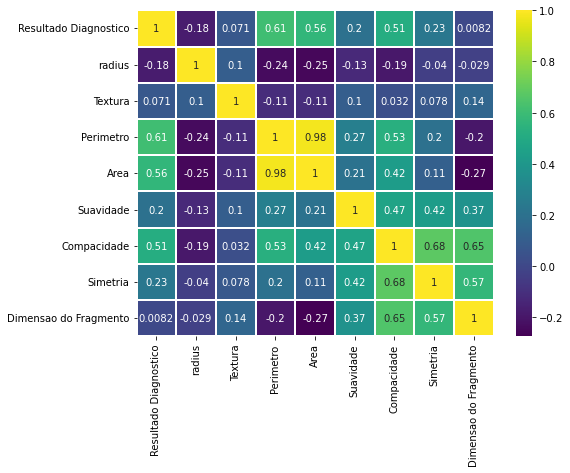

In [15]:
#Análise de correlação das variaveis
data_corr = data.corr()

#tamanho do gráfico
plt.figure(figsize=(8,6))

#plot
sns.heatmap(data_corr, 
            linewidths=.1, 
            cmap='viridis', 
            annot=True);

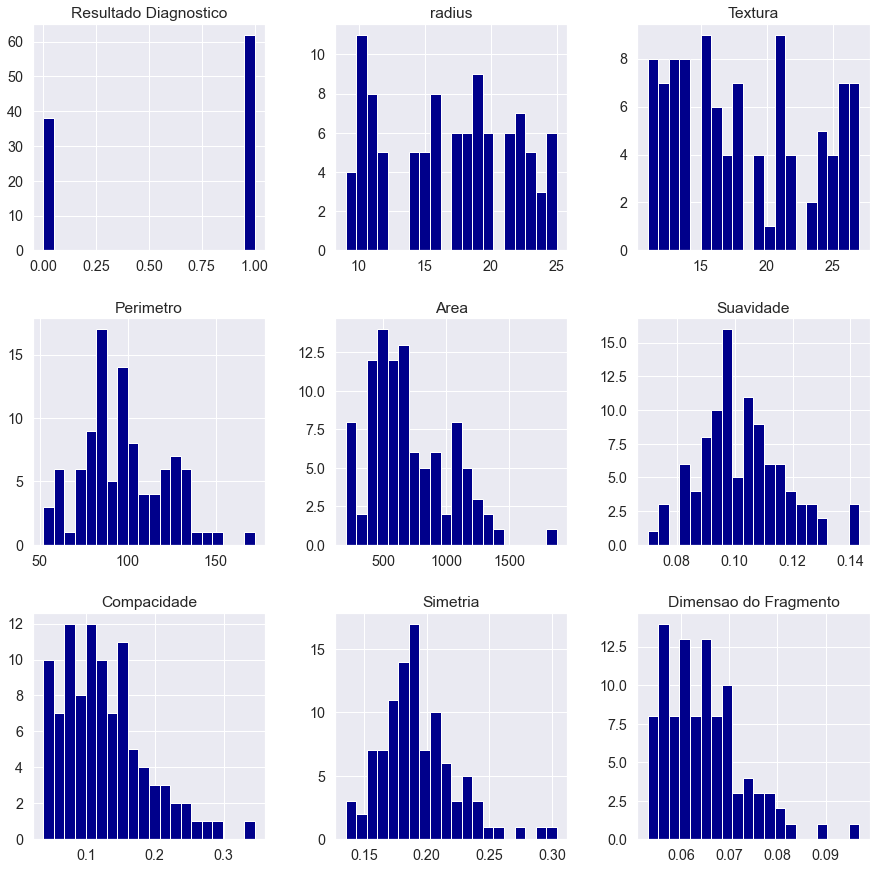

In [17]:
# --- Plotando todos os dados

# Definindo parametros de tamanho dos gráficos
sns.set( font_scale=1.3, rc={'figure.figsize':(15, 15)} )

# Plotando todos gráficos como histogram
# ajuste no tamanho da barra e cor
ax = data.hist( bins=20, color='darkblue' )

De acordo com o gráfico de correlação, podemos observar que as variaveis 'Dimensao do Fragmento' e 'Textura' tem baixa correlação com a variavel target, sendo assim eliminaremos do nosso df.
'Perimetro' e 'Area' tem forte correlação, que pode implicar em redundancia e deixar o modelo tendencioso, por isso eliminaremos o 'Perimetro'.

In [18]:
data2 = data.drop(['Dimensao do Fragmento','Textura','Perimetro'], axis=1) 

In [46]:
#Separando em treino e teste
X = data.drop(['Resultado Diagnostico'], axis=1) #features
y = data['Resultado Diagnostico'] #label

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=10) 

In [47]:
#Treinamento do Modelo com regressão logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

In [48]:
#Treinamento do Modelo com Random Forest 

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [32]:
#Predict.Proba 
rfc_pred_proba = rfc.predict_proba(X_test)

In [33]:
rfc_pred_proba

array([[0.09090909, 0.90909091],
       [0.03636364, 0.96363636],
       [0.03636364, 0.96363636],
       [0.03636364, 0.96363636],
       [0.61818182, 0.38181818],
       [0.4       , 0.6       ],
       [0.        , 1.        ],
       [0.94545455, 0.05454545],
       [0.21818182, 0.78181818],
       [0.18181818, 0.81818182],
       [0.03636364, 0.96363636],
       [0.01818182, 0.98181818],
       [0.18181818, 0.81818182],
       [0.05454545, 0.94545455],
       [0.16363636, 0.83636364],
       [0.47272727, 0.52727273],
       [0.34545455, 0.65454545],
       [0.        , 1.        ],
       [0.07272727, 0.92727273],
       [0.6       , 0.4       ]])

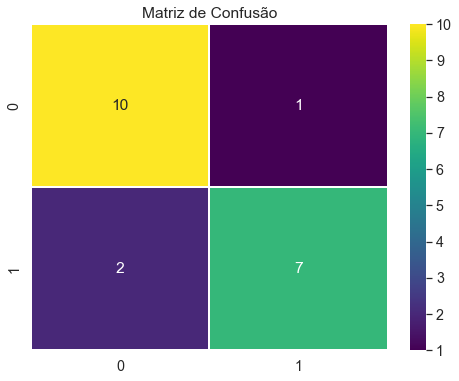

In [49]:
#Matriz de confusão LogReg
matriz = confusion_matrix(y_test, logreg_pred)

plt.figure(figsize=(8,6))

sns.heatmap(matriz, linewidths=.1, cmap='viridis', annot= True)
plt.title('Matriz de Confusão');

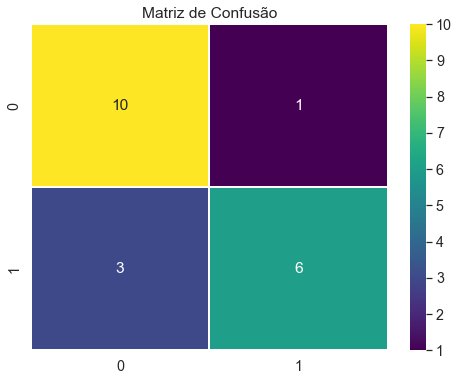

In [50]:
#Matriz de confusão Random Forest
matrizRFC = confusion_matrix(y_test, rfc_pred)

plt.figure(figsize=(8,6))

sns.heatmap(matrizRFC, linewidths=.1, cmap='viridis', annot= True)
plt.title('Matriz de Confusão');

In [51]:
#Report LogReg 
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.88      0.78      0.82         9

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20



In [52]:
#Report RandomForest 
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



A regressão logistica apresentou uma melhor performance para esse problema!